<a href="https://colab.research.google.com/github/AuraFrizzati/DE-Zoomcamp-AF/blob/main/Module2_Workflow_Orchestration_Kestra_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 2: Worflow Orchestration with Kestra**

Welcome to **Module 2** of the **Data Engineering Zoomcamp**! This week, we'll dive into **workflow orchestration** using **Kestra**. https://kestra.io/

Kestra is an **open-source**, **event-driven orchestration platform** that simplifies building both **scheduled** and **event-driven workflows**. By adopting **Infrastructure as Code practices** for **data** and **process orchestration**, Kestra enables you to build reliable workflows with just a few lines of `YAML`.

All youtube videos here: https://www.youtube.com/playlist?list=PLEK3H8YwZn1oPPShk2p5k3E9vO-gPnUCf

## **Index**

- **2.1. Conceptual Material: Introduction to Orchestration and Kestra**. In this section, you'll learn the **foundations** of **workflow orchestration**, its **importance**, and how **Kestra** fits into the orchestration landscape.

- **2.1. Hands-On Coding Project: Build Data Pipelines with Kestra**. We're gonna **build ETL pipelines** for Yellow and Green Taxi data from NYC's Taxi and Limousine Commission (TLC). You will:
  - **Extract** data from **CSV files**.
  - **Load** it into **Postgres** or **Google Cloud** (**GCS** + **BigQuery**).
  - Explore **scheduling** and **backfilling workflows**.

- **2.3. ETL Pipelines in Kestra: Detailed Walkthrough**. This introductory flow is added just to demonstrate a **simple data pipeline** which **extracts data via HTTP REST API**, **transforms** that data in **Python** and then **queries it using DuckDB**. For this stage, a new separate Postgres database is created for the exercises.

- **2.4. ETL Pipelines in Kestra: Google Cloud Platform**. Now that you've learned how to build ETL pipelines locally using Postgres, we are ready to move to the cloud. In this section, we'll **load** the same Yellow and Green Taxi data to Google Cloud Platform (**GCP**) using:
  - **Google Cloud Storage** (**GCS**) as a **data lake**
  - **BigQuery** as a **data warehouse**.

- **2.5. Bonus: Deploy to the Cloud**. Now that we've got our ETL pipeline working both locally and in the cloud, we can **deploy Kestra to the cloud** so it can **continue to orchestrate our ETL pipelines monthly with our configured schedules**, We'll cover how you can install Kestra on Google Cloud in **Production**, and **automatically sync and deploy your workflows from a Git repository**.

## **2.1. Conceptual Material: Introduction to Orchestration and Kestra**

### **Kestra: Product Overview**
https://www.youtube.com/watch?v=feC6-KQLYyA

- **Kestra** is a **scalable and declarative orchestrator** that allows you to **scale** all your business critical **applications** effortlessly with the option to write everything programmatically or directly inside of the UI.

- Thanks to hundreds of **built-in plugins** and **embedded Code editor** with **Git** and **Terraform** integrations, Kestra makes **scheduled** and **event-driven data pipelines** effortless.

### **What is an Orchestrator?**
https://www.youtube.com/watch?v=ZV6CPZDiJFA
https://kestra.io/blogs/2024-09-18-what-is-an-orchestrator

An **orchestrator** coordinates **multiple tasks, pipelines, microservices, CI/CD platforms** and makes sure they work in unison to ensure a smooth operation.

In **software engineering** and **data management**, an **orchestrator** is a **tool** that **automates**, **manages**, and **coordinates various workflows** and **tasks** across **different services**, **systems**, or **applications**.

Think of it like a **conductor of an orchestra**, making sure **all components perform in harmony**, following a **predefined sequence** or **set of rules**. Whether you're dealing with data pipelines, microservices, or CI/CD systems, an orchestrator ensures everything runs reliably without manual intervention.

#### **Orchestration vs Automation**

What's the difference between automation and orchestration? These two concepts are related but not quite the same:

- **Automation** refers to the **execution** of **individual tasks** or **actions without manual intervention**. For example, automatically triggering a test suite after a pull request is opened.

- **Orchestration** goes beyond automation by **managing the flow of multiple interconnected tasks or processes**. It defines not only **what happens** but also **when** and **how things happen**, ensuring that **all tasks** (whether automated or not) are **executed in the correct order**, with the **right dependencies** and **error handling** in place.

In essence, while **automation** focuses on **individual tasks**, **orchestration** ensures **all those tasks** are **arranged** and **managed** within a **broader, cohesive system**. This matters if you need to reliably handle **complex processes** with **many interdependent steps**.

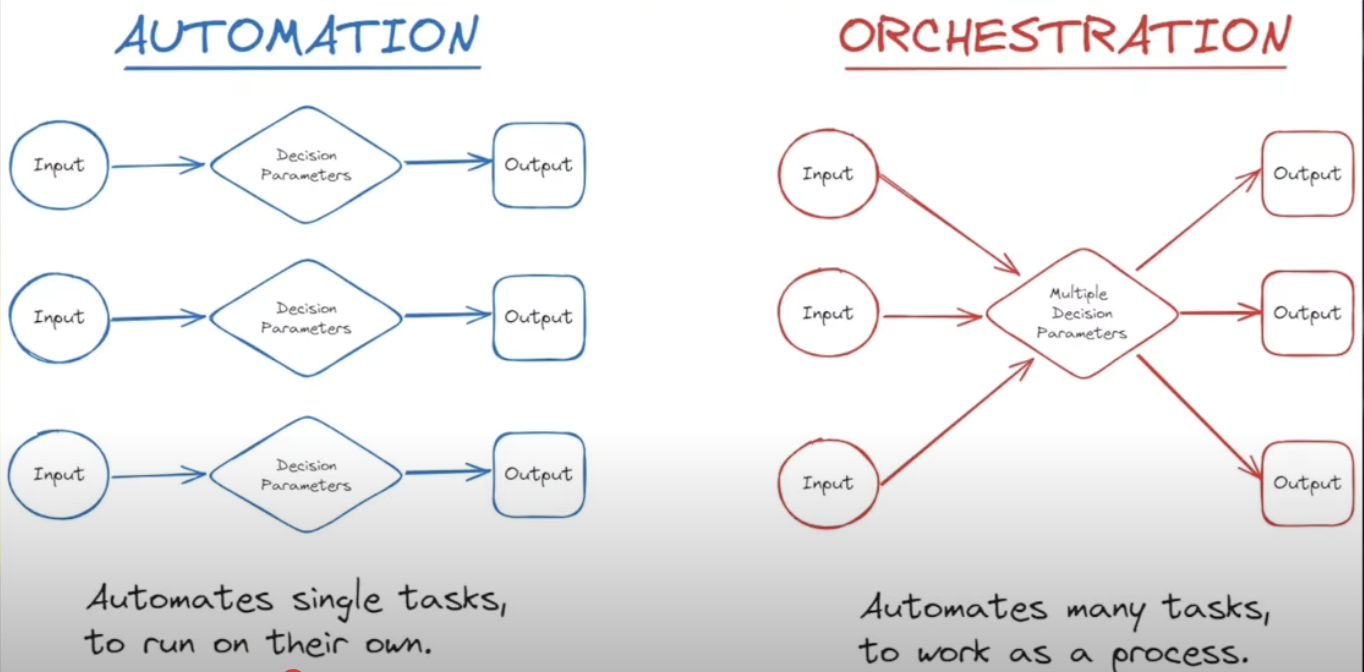



**Use cases** for **orchestrators**:

1. **Data-driven environments** or **data pipeline orchestration**: orchestrators can be used for coordinating **ETL tasks**, to extract the data from a variaety of different sources, process it and then load it into a data warehouse. Consider an **ETL workflow** where **data** is **extracted** from a **source**, **transformed**, and then **loaded** into a **database**. The orchestrator ensures these steps happen in **sequence**: first extracting the data, then transforming it, and finally loading it into the database. If **one step fails**, the **orchestrator** can **retry** or **trigger an error-handling process**.

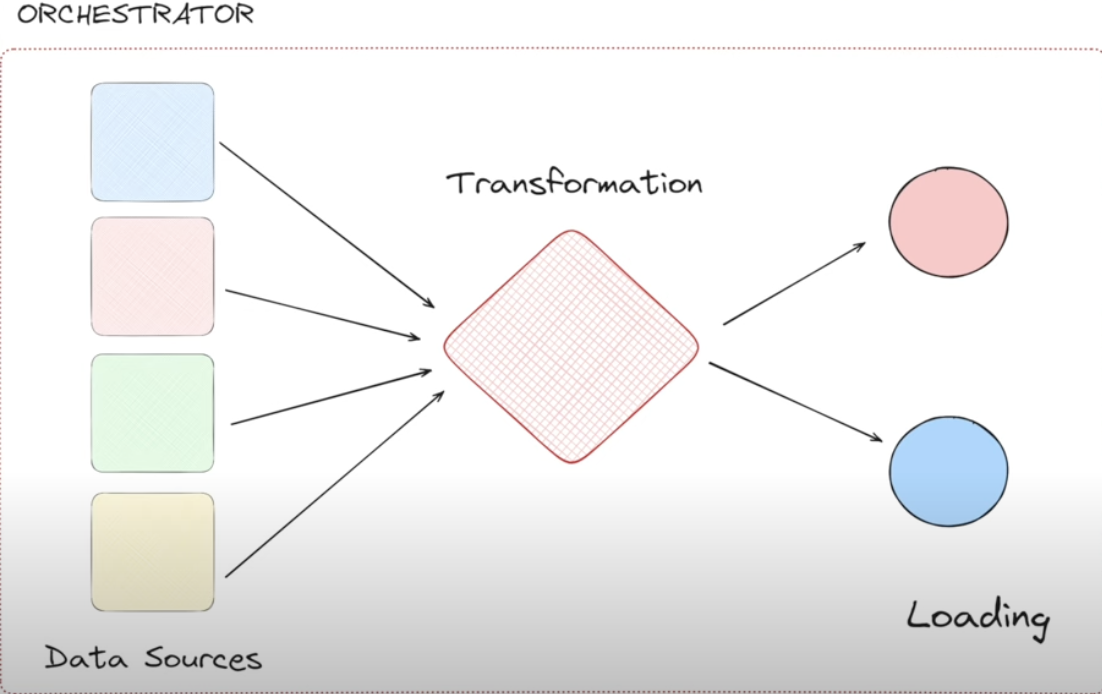

2. **CI/CD pipelines**: orchestrator can help in **build**, **test** and **publish** your **code** to a range of **different places** at the **same time**. In a CI/CD pipeline, orchestration involves tasks like **compiling code**, **running tests**, **deploying** to a **staging environment**, and **triggering manual approval** for **production deployment**. The orchestrator ensures that each task runs in the **correct order** and only when the **previous task** has been **successfully completed**

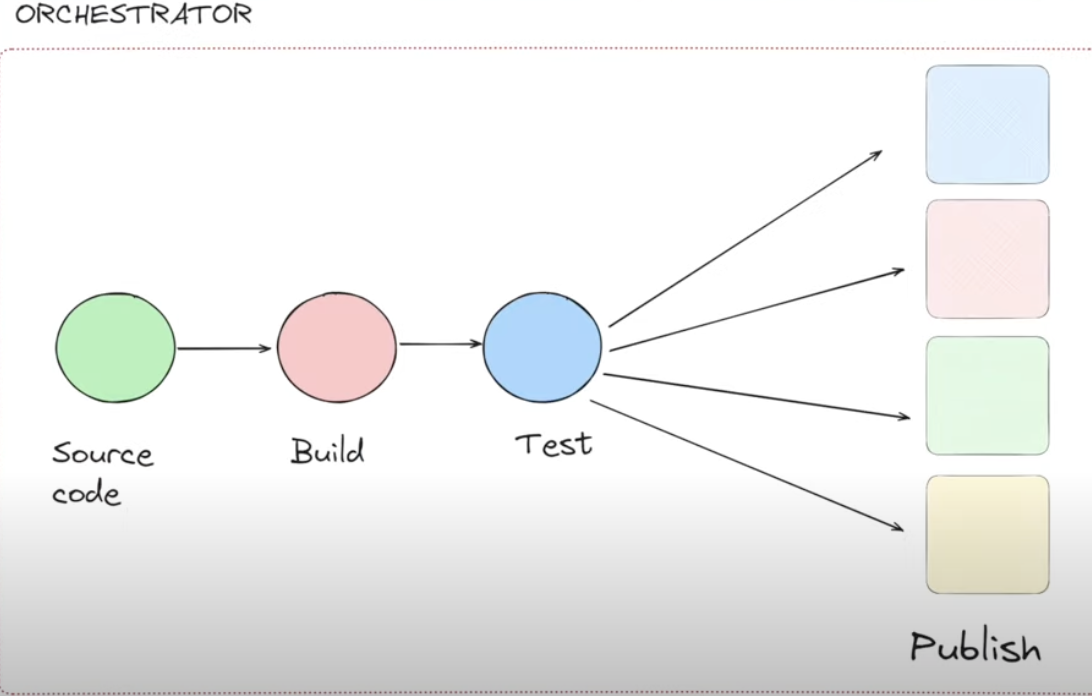


3. **Distributed systems**: **microservices** often need to **communicate one with the other** and orchestrators can be used to make this happen by **managing their lifecycles** to make them start/stop/restart, etc

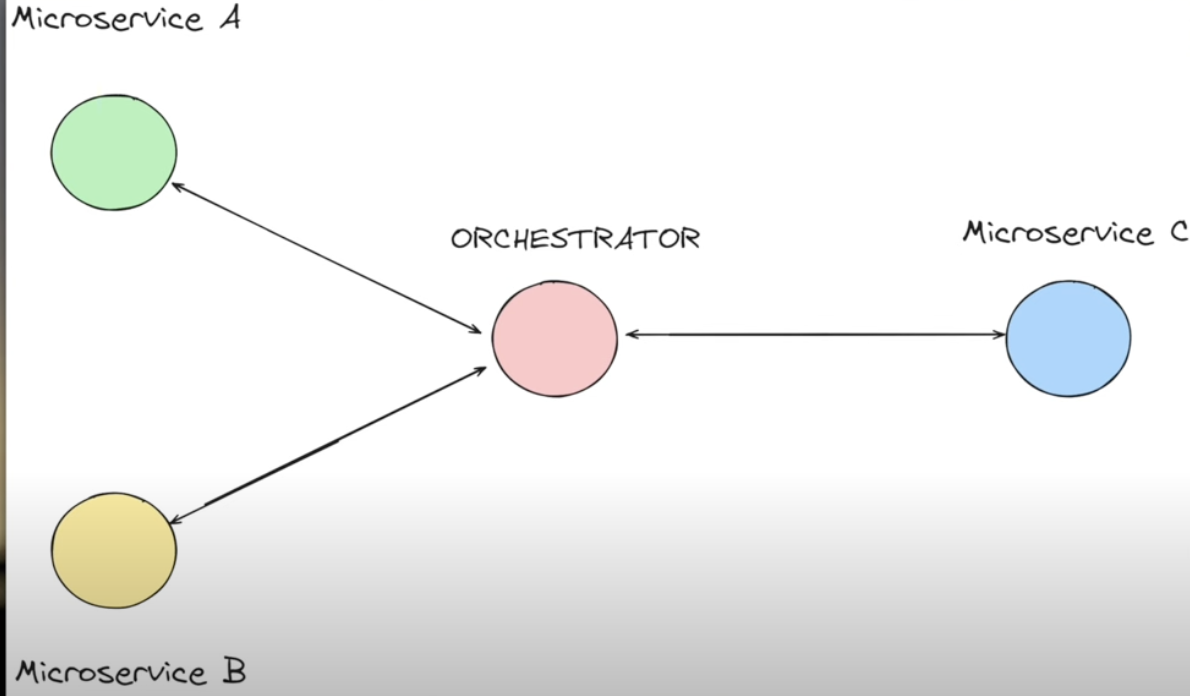



4. **Provision of resources in a cloud-based infrastructure** with an orchestrator. When **deploying a new environment in the cloud**, an orchestrator manages the **provisioning** of **servers**, **databases**, and **network configurations**. It ensures that all **resources** are **created in the right order**, **handling dependencies** such as setting up the network before deploying a database.

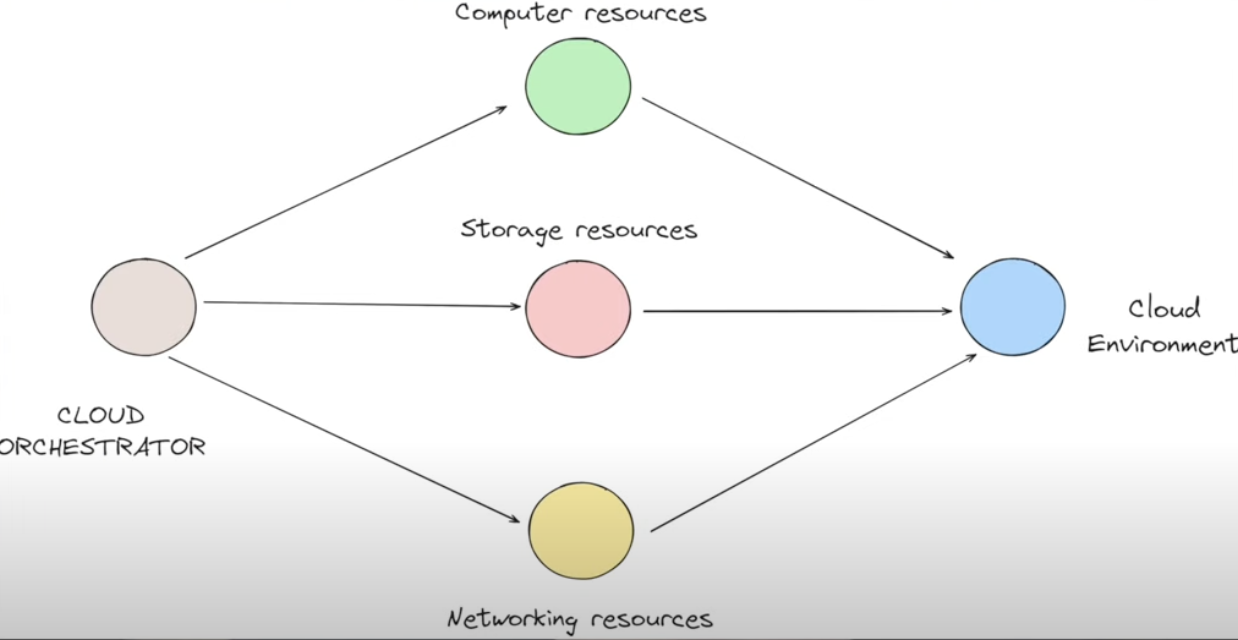

#### **Installation with Docker**
https://kestra.io/docs/installation/docker

Once you have Docker running, you can start Kestra in a single command

```
docker run --pull=always --rm -it -p 8080:8080 --user=root -v /var/run/docker.sock:/var/run/docker.sock -v /tmp:/tmp kestra/kestra:latest server local
```

The above command starts Kestra with an **embedded H2 database** (not persistent!)

Open `http://localhost:8080` in your browser to launch the UI and start building your first flows.

#### **Docker Compose**
Start Kestra with a **PostgreSQL database backend** using a **Docker Compose** file

#### **Quickstart**

https://kestra.io/docs/getting-started/quickstart

Basic concepts:

- Inside the platform, **workflows** are called **flows** and they are declared in `YAML`, so they are human readable and compatible with any language
- Each **flow** has **three key properties**:
    - `id`: the **name** of your **flow**
    - `namespace`: the **environment** for your **flow**. This property enables you to separate the development and production environments, for example.
    - `tasks`: **list of tasks** to **execute** with your **flow**. Each task can have its own **properties**, such as its own `id`, its `type` and its `message`

Example:
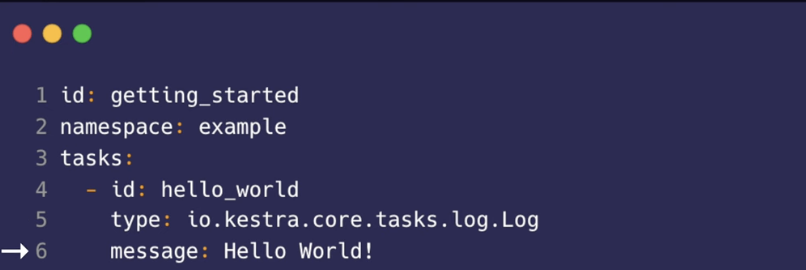


- Another important concept is `inputs`: they can be **defined** at the **top of your code**, so their values can be hard-coded and do not need to be repeated:
    - `{{ inputs.variable_name }}`

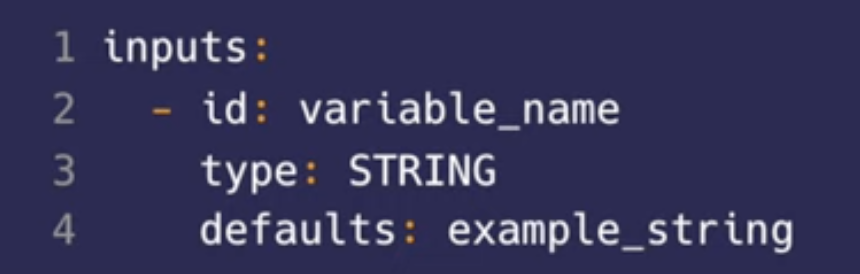



- `outputs`: some **tasks** will generate an **output** which can be **stored** and **used later** on in an **additional task**
    - {{ outputs.task_id.vars.output_name }}

- `triggers`: they enable **flows** to be **automatically executed** when **certain conditions happen** (e.g. a schedule, a web hook, etc)

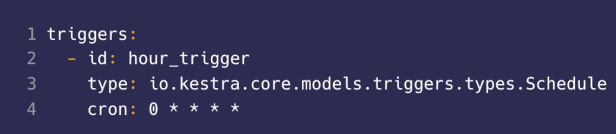

### **Tutorial**
https://kestra.io/docs/tutorial

Kestra is an **open-source orchestrator** designed to bring I**nfrastructure as Code** (**IaC**) best practices to all **workflows** — from those orchestrating mission-critical applications, IT operations, business processes, and data pipelines, to simple Zapier-style automations.

You can use Kestra to:

- **run workflows on-demand**, **event-driven** or based on a **regular schedule**
- **programmatically interact** with **any system** or **programming language**
- **orchestrate microservices**, **batch jobs**, **ad-hoc scripts** (written in Python, R, Julia, Node.js, and more), **SQL queries**, **data ingestion syncs**, **dbt** or **Spark jobs**, or any other applications or processes.

In this tutorial we gradually introduce new **concepts** including **namespaces**, **tasks**, **parametrization** with **inputs** and **scheduling** using **triggers**.

We then dive into **parallel task execution**, **error handling**, as well as **custom scripts** and **microservices** running in **isolated containers**. 

#### **Flows**
https://kestra.io/docs/workflow-components/flow

Flow is a **container for tasks** and their **orchestration logic**.

Flows are **defined** in a **declarative `YAML` syntax** to keep the **orchestration code portable** and **language-agnostic**.

Each flow consists of **three required components**: `id`, `namespace`, and `tasks`:

- `id` represents the **name of the flow**. The id of a flow must be **unique** within a **namespace**. The **combination** of `id` and `namespace` serves as a **unique identifier for a flow**.
- `namespace` can be used to **separate development** and **production environments**.
- `tasks` is a **list of tasks that will be executed in the order** they are defined.

Here are those three components in a YAML file:

```
id: getting_started
namespace: company.team
tasks:
  - id: hello_world
    type: io.kestra.plugin.core.log.Log
    message: Hello World!
```





#### **Namespaces**
https://kestra.io/docs/workflow-components/namespace

- Namespaces are used to **group flows** and **provide structure**. Keep in mind that the **allocation** of a flow to a namespace is **immutable**. Once a flow is created, you **cannot change its namespace**. If you need to change the namespace of a flow, create a new flow within the desired namespace and delete the old flow.
- Namespaces are also used to **manage access** to **secrets**, **plugin defaults**, and **variables**.
- You can think of a namespace as a **folder** for your flows. Similar to folders on your file system, namespaces can be used to **organize flows into logical categories**. Similar to filesystems, namespaces can be **indefinitely nested**.



#### **Labels**

https://kestra.io/docs/workflow-components/labels

To add **another layer of organization**, you can use labels, allowing you to **group flows** using **key-value pairs**.

```
id: flow_with_labels
namespace: company.team

labels:
  song: never_gonna_give_you_up
  artist: rick_astley

tasks:
  - id: hello
    type: io.kestra.plugin.core.log.Log
    message: hello from a flow with labels
```

#### **Description(s)**

https://kestra.io/docs/workflow-components/descriptions

- You can **optionally** add a **description property** to document your **flow**'s or **task**'s or **trigger**'s **purpose** or other useful information. The description is a **string that supports markdown syntax**. That markdown description will be **rendered** and **displayed in the UI**.

```
id: getting_started
namespace: company.team

description: |
    # Getting started
    Let's `write` some **markdown** - [first flow](https://t.ly/Vemr0) 🚀

labels:
  owner: rick.astley
  project: never-gonna-give-you-up

tasks:
  - id: hello_world
    type: io.kestra.plugin.core.log.Log
    message: Hello World!
    description: |
      ## About this task
      This task will print "Hello World!" to the logs.
```

#### **Tasks**
https://kestra.io/docs/workflow-components/tasks

Tasks are **atomic actions** in your **flows**. You can design your tasks to be **small** and **granular**, such as fetching data from a REST API or running a self-contained Python script. However, tasks can also represent **large and complex processes**, like triggering containerized processes or long-running batch jobs (e.g. using dbt, Spark, AWS Batch, Azure Batch, etc.) and waiting for their completion.

##### **The order of task execution**
Tasks are **defined** in the form of a **list**. By **default**, all tasks in the list will be **executed sequentially** — the second task will start as soon as the first one finishes successfully.

Kestra provides **additional customization** allowing to **run tasks in parallel**, **iterating** (**sequentially** or **in parallel**) **over a list of items**, or to **allow failure** of **specific tasks**. These kinds of actions are called **Flowable tasks** because they define the flow logic.

A task in Kestra must have an **id** and a **type**. Other **properties** depend on the **task type**. You can think of a task as a **step in a flow** that should **execute a specific action**, such as running a Python or Node.js script in a Docker container, or loading data from a database.

```
tasks:
  - id: python
    type: io.kestra.plugin.scripts.python.Script
    containerImage: python:slim
    script: |
      print("Hello World!")
```

## **2. Hands-On Coding Project: Build Data Pipelines with Kestra**

This week, we're gonna **build ETL pipelines** for Yellow and Green Taxi data from NYC’s Taxi and Limousine Commission (TLC). 

You will:
1. **Extract data** from **CSV** files.
2. **Load** it into **Postgres** or **Google Cloud** (**GCS** + **BigQuery**).
3. Explore **scheduling** and **backfilling workflows**.

### **File Structure**

The project is organized as follows:

```
.
├── flows/
│   ├── 01_getting_started_data_pipeline.yaml
│   ├── 02_postgres_taxi.yaml
│   ├── 02_postgres_taxi_scheduled.yaml
│   ├── 03_postgres_dbt.yaml
│   ├── 04_gcp_kv.yaml
│   ├── 05_gcp_setup.yaml
│   ├── 06_gcp_taxi.yaml
│   ├── 06_gcp_taxi_scheduled.yaml
│   └── 07_gcp_dbt.yaml
```

### **Setup Kestra**

We'll **set up Kestra** using **Docker Compose** containing **one container for the Kestra server** and **another for the Postgres database**:

```
cd 02-workflow-orchestration/
docker compose up -d
```

Once the **container starts**, you can **access** the **Kestra UI** at `http://localhost:8080`.

If you prefer to **add flows programmatically** using **Kestra's API**, run the following commands:

```
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/01_getting_started_data_pipeline.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/02_postgres_taxi.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/02_postgres_taxi_scheduled.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/03_postgres_dbt.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/04_gcp_kv.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/05_gcp_setup.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/06_gcp_taxi.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/06_gcp_taxi_scheduled.yaml
curl -X POST http://localhost:8080/api/v1/flows/import -F fileUpload=@flows/07_gcp_dbt.yaml
```


#### **`01_getting_started_data_pipeline.yaml`**

This **Kestra flow** defines a **simple data pipeline** that 
1. **extracts data from a web API**
2. **transforms** it using a **Python script**
3. **queries** the **transformed data** using **DuckDB**

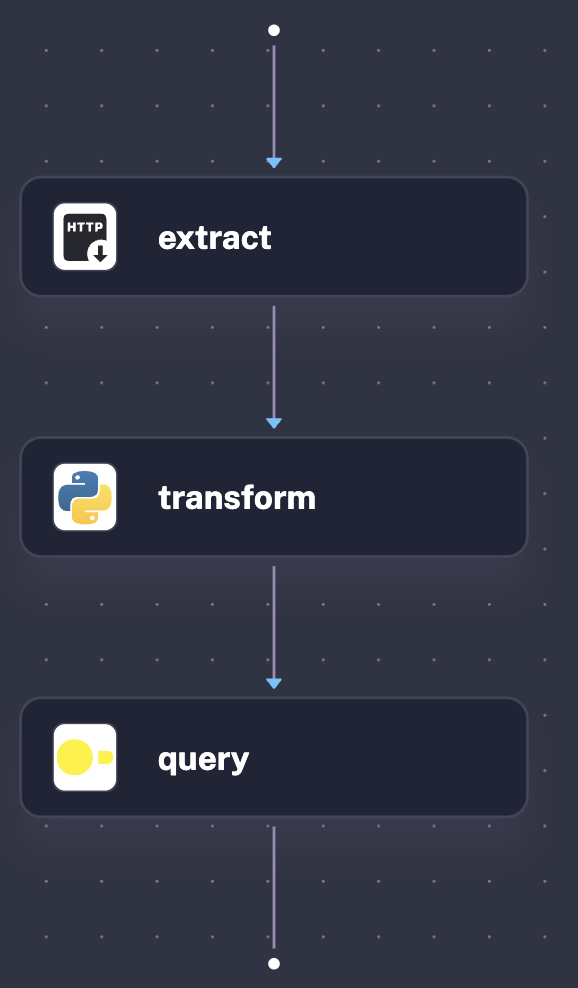

```yaml
id: 01_getting_started_data_pipeline
namespace: zoomcamp

# Define input parameters
inputs:
  - id: columns_to_keep
    type: ARRAY
    itemType: STRING
    defaults:
      - brand
      - price

tasks:
  # Task to download data from a web API
  - id: extract
    type: io.kestra.plugin.core.http.Download # download data from a specific URI
    uri: https://dummyjson.com/products

  # Task to transform the downloaded data using a Python script
  - id: transform
    type: io.kestra.plugin.scripts.python.Script # this runs a python script
    containerImage: python:3.11-alpine # This is the Docker image to use to run the script
    inputFiles:
      data.json: "{{outputs.extract.uri}}" # the output of the extract task is used as input to the transform task
    outputFiles:
      - "*.json" # the python script will generate JSON files
    env: #the environment vars (inputs) to pass to the script
      COLUMNS_TO_KEEP: "{{inputs.columns_to_keep}}" 
    script: | # the python script to run
      import json
      import os

      # the script reads the environment variable COLUMNS_TO_KEEP
      columns_to_keep_str = os.getenv("COLUMNS_TO_KEEP")
      columns_to_keep = json.loads(columns_to_keep_str)

      # the script loads the downloaded data from data.json
      with open("data.json", "r") as file:
          data = json.load(file)
      
      # the script filters the data to keep only the specified cols
      filtered_data = [
          {column: product.get(column, "N/A") for column in columns_to_keep}
          for product in data["products"]
      ]

      # the script writes the filtered data to products.json
      with open("products.json", "w") as file:
          json.dump(filtered_data, file, indent=4)

  # Task to query the transformed data using DuckDB
  - id: query
    type: io.kestra.plugin.jdbc.duckdb.Query # this task runs a SQL query using DuckDB
    inputFiles:
      products.json: "{{outputs.transform.outputFiles['products.json']}}" # the input file of this task is the output of the transform task
     
    # first install json extension for DuckDB
    sql: |
      INSTALL json; 
      LOAD json;
      SELECT brand, round(avg(price), 2) as avg_price
      FROM read_json_auto('{{workingDir}}/products.json')
      GROUP BY brand
      ORDER BY avg_price DESC;
    fetchType: STORE  # how to fetch the query results

#### **`02_postgres_taxi.yaml`**

https://www.youtube.com/watch?v=OkfLX28Ecjg



https://github.com/DataTalksClub/nyc-tlc-data

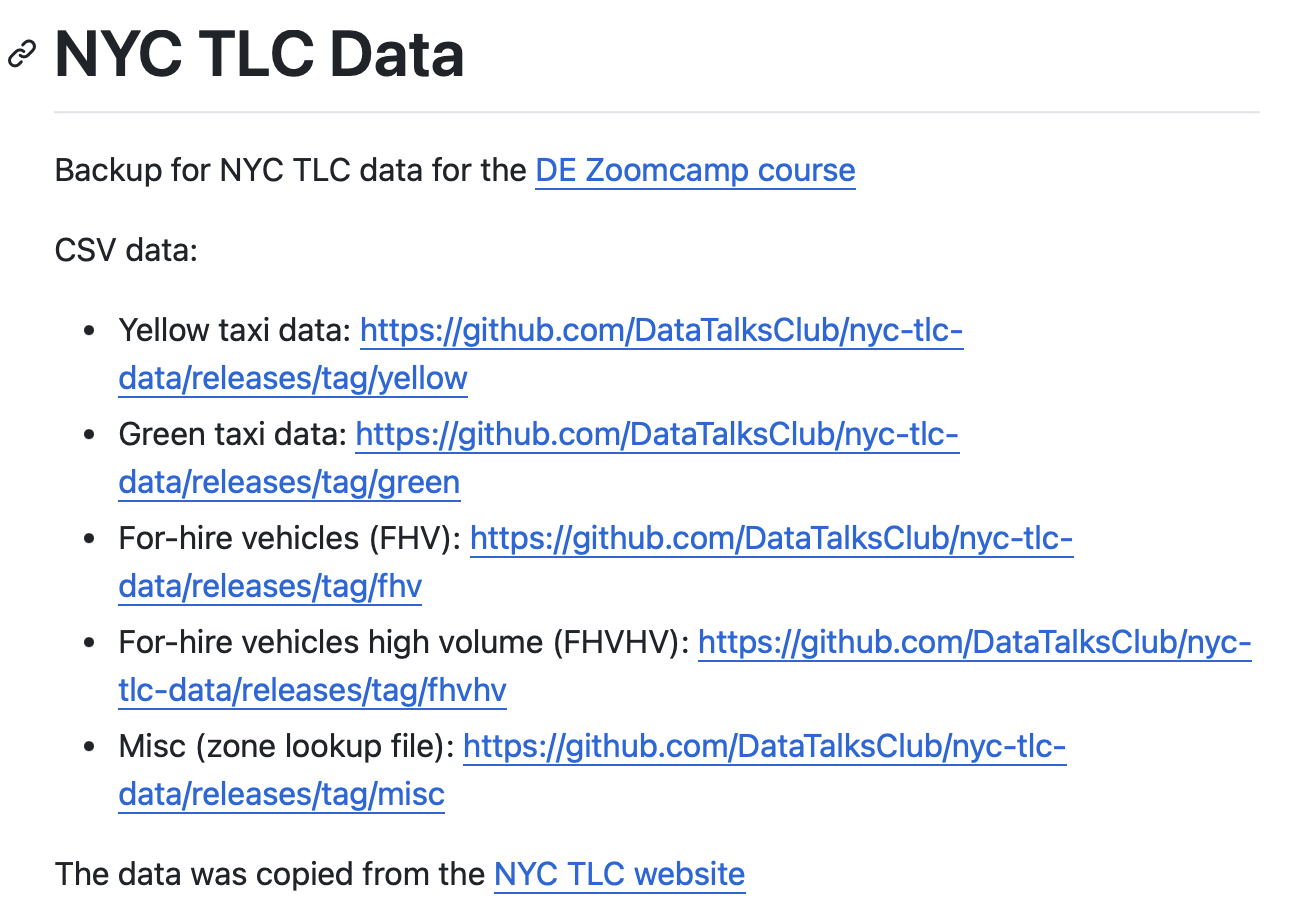

We will now setup an **ETL pipeline** with **Kestra** using **Postgres**.
For this example we have a bunch of data available on the New York taxi datasets, a **yellow** and a **green** dataset.

- https://github.com/DataTalksClub/nyc-tlc-data/releases/tag/yellow
- https://github.com/DataTalksClub/nyc-tlc-data/releases/tag/green


We are going to look at some of this data, then perform some operations on it using Kestra and finally put it into a database...

If we look for example at the Yellow Taxi dataset, we can see it is **split into months** and we assume that every month we get more data... We have data for all 2019, 2020 and up to July of 2021. We can **create a workflow** that **processes this data each month** and **add it into a table** that **combines it all together**

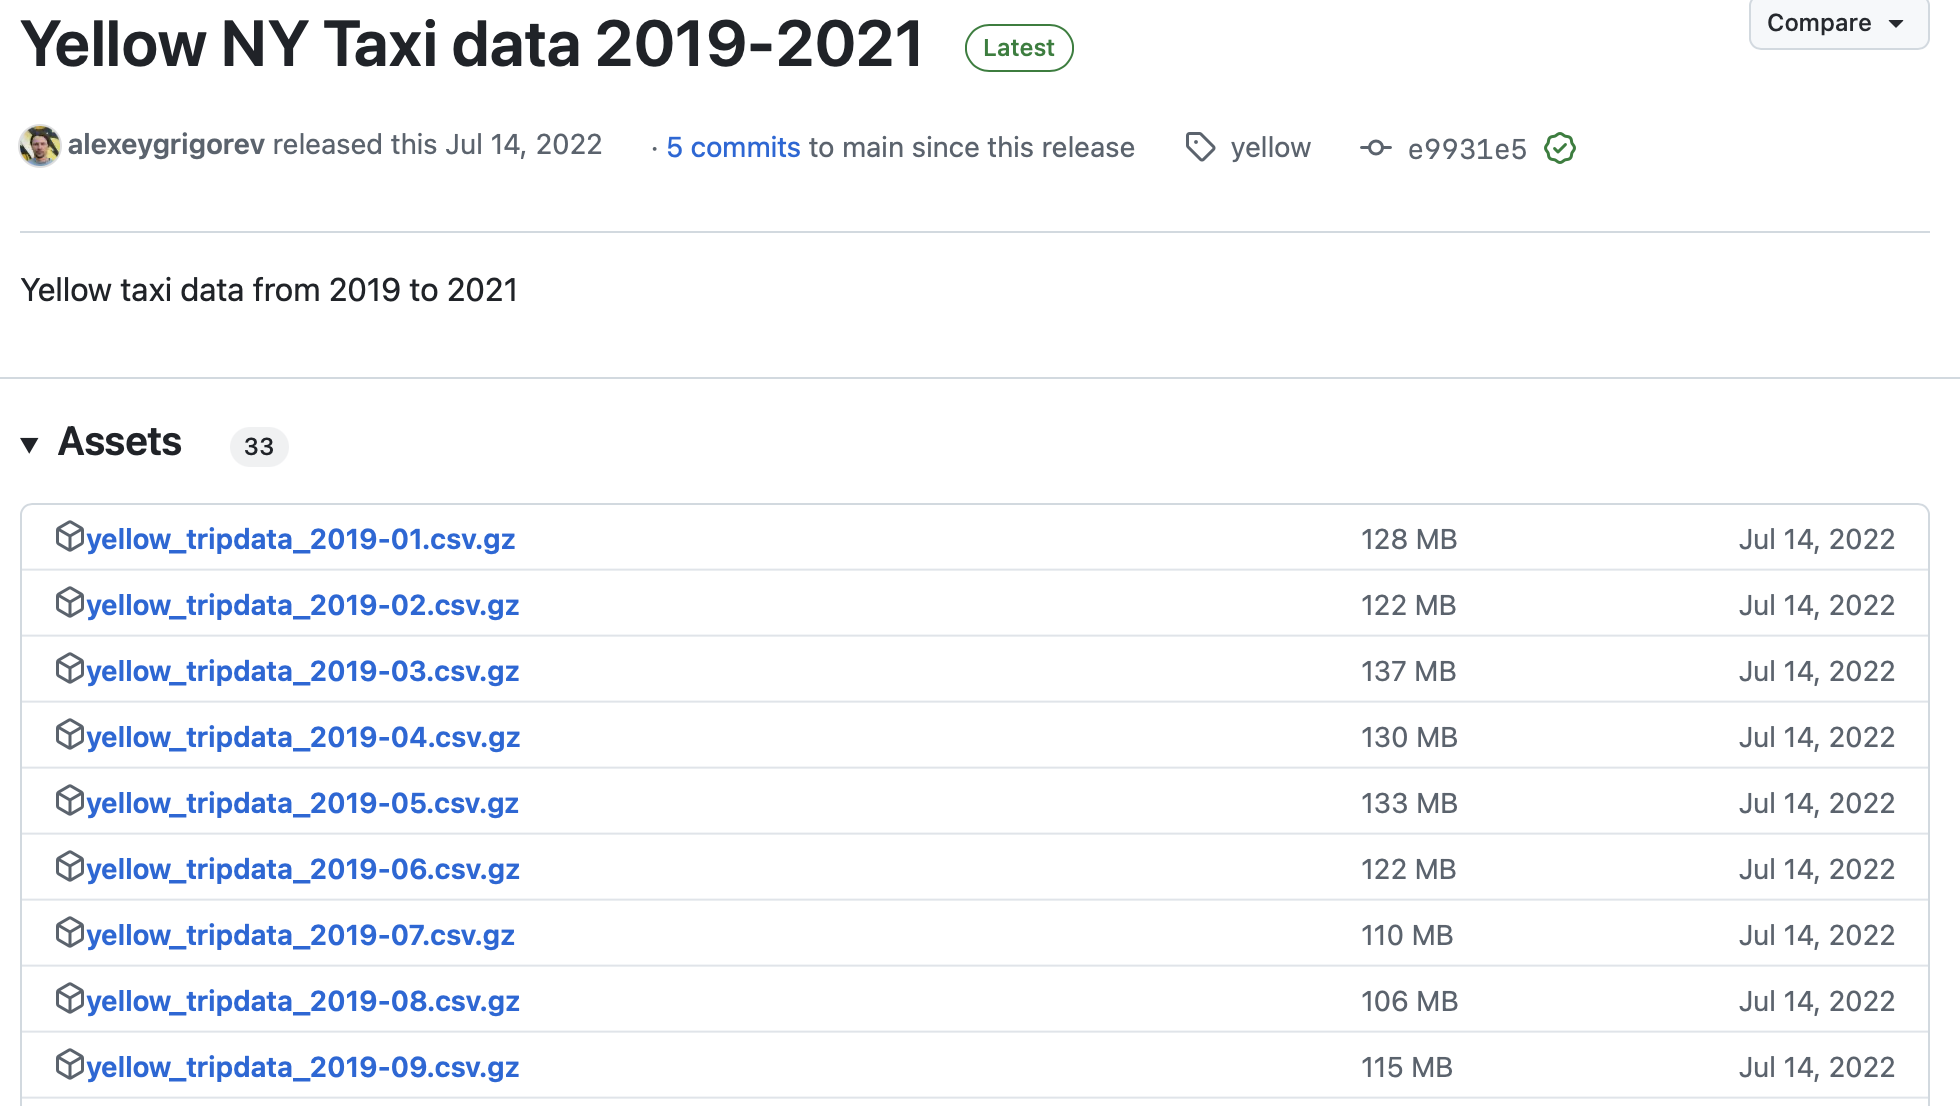

As a start, we will need to create a **number of tasks** to **perform ETL**:  
I. we need to **extract the data** from the **Github repository**: we can do this by **making a request to the repository**  
II. we then want to **transform the data**, in this example we want to **merge it** into a **table that has all the data** using a **postgres database**

Let's focus on **extracting the data from Github**..
1. we will first create a **filter** to **distinguish** between **green** and **yellow taxis**, by adding an **input** of type `SELECT`.

2. We also add another input to allow to select the month and year

```yaml
id: postgres-taxi
namespace: my_space

inputs:
    - id: taxi
      type: SELECT
      displayName: Select taxi type
      values: ['yellow','green']
      defaults: 'yellow'

    - id: year
      type: SELECT
      displayName: Select year
      values: ["2019","2020"]
      defaults: "2019"
    
    - id: month
      type: SELECT
      displayName: Select year
      values: ['01','02','03','04','05','06','07','08','09','10','11','12']
      defaults: '01'

tasks:
    - id: hello
      type: io.kestra.plugin.core.log.log
      message: hello world!
```


We can now create the **request** to **get the input data we need**. To make things easier, since we have all these **inputs values that are going to change at each execution** and we want to use them to form file names and table names, we can create **variables** that are **dynamically generated** based on these inputs.

```yaml
variables:
    # the files we will download
    file: "{{inputs.taxi}}_tripdata_{{inputs.year}}-{{inputs.month}}.csv"
    # the staging table that we are going to load with the monthly data from a single file
    staging_table: "public.{{inputs.taxi}}_tripdata_staging"
    # the table contains all the data, with multiple months and years
    table: "public.{{inputs.taxi}}_tripdata"
    # this is the data itself that will be generated as an output from the extract task
    data: "{{outputs.extract.outputFiles[inputs.taxi ~ '_tripdata_' ~ inputs.year ~ '-' ~ inputs.month ~ '.csv'}}"
```

We also add a `set_label` **task** to help us **identify** if it is a **green** or a **yellow taxi execution**:

```yaml
tasks:
  - id: set_label
    type: io.kestra.plugin.core.execution.Labels
    labels:
      file: "{{render(vars.file)}}"
      taxi: "{{inputs.taxi}}"
```

For the **extract task** we are using a **shell command** to run `wget` to be able to **pull the relevant csv file from Github** and **unzip it** (since the raw data is in `*.gz` **compressed format**). This task will generate a `.csv` **file** that we will be able to use downstream...

```yaml
  - id: extract
    type: io.kestra.plugin.scripts.shell.Commands
    outputFiles:
      - "*.csv"
    taskRunner:
      type: io.kestra.plugin.core.runner.Process
    commands:
      - wget -qO- https://github.com/DataTalksClub/nyc-tlc-data/releases/download/{{inputs.taxi}}/{{render(vars.file)}}.gz | gunzip > {{render(vars.file)}}
```

We can now **visualise the extracted csv file** in the `Outputs` section of the executed task `extract`:


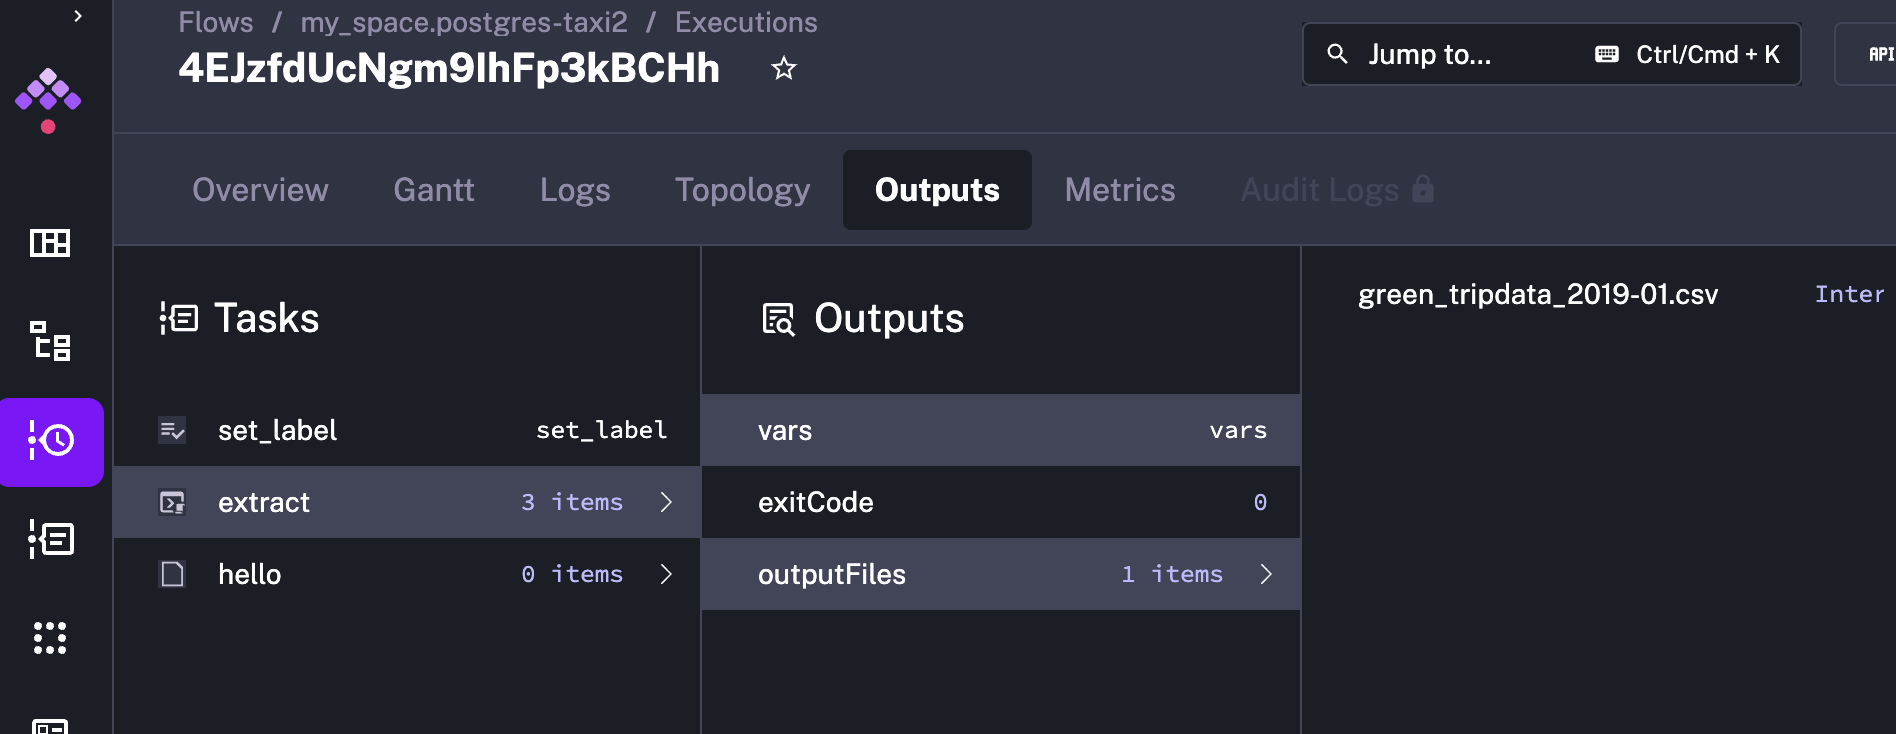

we can also preview its content (and download it locally as well):

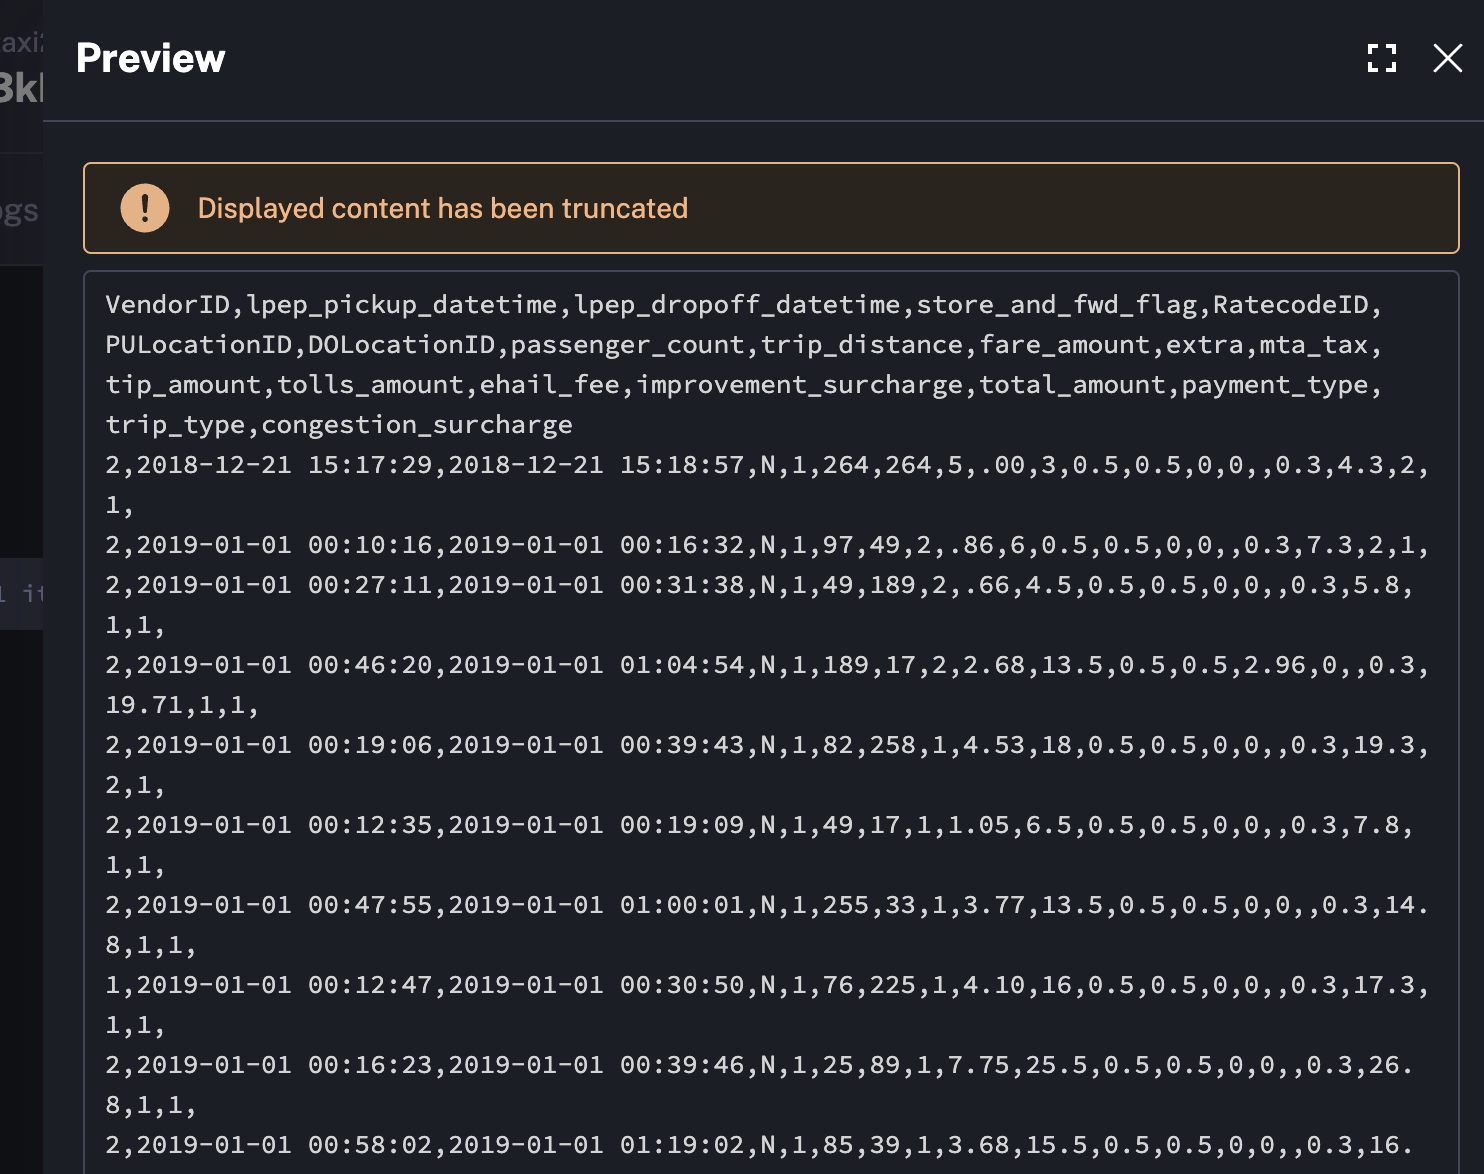

In order to put this **data into a table** we need to **create a database**. Kestra itself runs on a postgres database, so we could use that. However for this tutorial we will spin pu our own postgres database using Docker. We are going to use a simple docker-compose file to specify a postgres database:

```yaml
version: "3.8"
services:
  postgres:
    image: postgres
    container_name: postgres-db
    environment:
      POSTGRES_USER: kestra
      POSTGRES_PASSWORD: k3str4
      POSTGRES_DB: postgres-zoomcamp
    ports:
      - "5432:5432"
    volumes:
      - postgres-data:/var/lib/postgresql/data
volumes:
  postgres-data:
```

We are going to **connect this to kestra** and start **reading an writing into it**.

The sql table we will instantiate has two extra columns in comparison to the raw data: we have `unique_row_id` (generated using an **md5 hash** based on the **data in each row** so to **prevent to add duplicates later**) and `file_name` (to identify from which file the data came from)
```yaml
- id: green_create_table
  type: io.kestra.plugin.jdbc.postgresql.Queries
  sql: |
    CREATE TABLE IF NOT EXISTS {{render(vars.table)}} (
        unique_row_id          text,
        filename               text,
        VendorID               text,
        lpep_pickup_datetime   timestamp,
        lpep_dropoff_datetime  timestamp,
        store_and_fwd_flag     text,
        RatecodeID             text,
        PULocationID           text,
        DOLocationID           text,
        passenger_count        integer,
        trip_distance          double precision,
        fare_amount            double precision,
        extra                  double precision,
        mta_tax                double precision,
        tip_amount             double precision,
        tolls_amount           double precision,
        ehail_fee              double precision,
        improvement_surcharge  double precision,
        total_amount           double precision,
        payment_type           integer,
        trip_type              integer,
        congestion_surcharge   double precision
    );
```

for the **sql task to work** it will need a `url` to **identify the location of the postgres database**. We can use Kestra's `pluginDefaults` to **set the database** `url`, `username` and `password` **for all postgres tasks**. We use `host.docker.internal` because the postgres sql database is also running internally in Kestra

```yaml
pluginDefaults:
  - type: io.kestra.plugin.jdbc.postgresql
    values:
      url: jdbc:postgresql://host.docker.internal:5432/postgres-zoomcamp
      username: kestra
      password: k3str4
```

We will now create a **staging table** to separately **load each raw csv file** and then **append them one by one to the main table**:

```yaml
- id: green_create_staging_table
  type: io.kestra.plugin.jdbc.postgresql.Queries
  sql: |
    CREATE TABLE IF NOT EXISTS {{render(vars.staging_table)}} (
        unique_row_id          text,
        filename               text,
        VendorID               text,
        lpep_pickup_datetime   timestamp,
        lpep_dropoff_datetime  timestamp,
        store_and_fwd_flag     text,
        RatecodeID             text,
        PULocationID           text,
        DOLocationID           text,
        passenger_count        integer,
        trip_distance          double precision,
        fare_amount            double precision,
        extra                  double precision,
        mta_tax                double precision,
        tip_amount             double precision,
        tolls_amount           double precision,
        ehail_fee              double precision,
        improvement_surcharge  double precision,
        total_amount           double precision,
        payment_type           integer,
        trip_type              integer,
        congestion_surcharge   double precision
    );
```

We are going to **truncate** the `staging_table` so we can add new data for each combination of year and month. This **removes the data** of the table but **keeps the column names**.

```yaml
- id: green_truncate_staging_table
  type: io.kestra.plugin.jdbc.postgresql.Queries
  sql: |
    TRUNCATE TABLE {{render(vars.staging_table)}};
```



We are then going to **copy the new raw csv file content** into the `staging_table`:

```yaml
- id: green_copy_in_to_staging_table
    type: io.kestra.plugin.jdbc.postgresql.CopyIn
    format: CSV
    from: "{{render(vars.data)}}"
    table: "{{render(vars.staging_table)}}"
    header: true
    columns: [VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge]

```

The following code is used to create the extra two identifier columns for the database:  `unique_row_id` (generated using an **md5 hash** based on the **data in each row** so to **prevent to add duplicates later**) and `file_name` (to identify from which file the data came from)

```yaml
  - id: green_add_unique_id_and_filename
    type: io.kestra.plugin.jdbc.postgresql.Queries
    sql: |
      UPDATE {{render(vars.staging_table)}}
      SET 
        unique_row_id = md5(
          COALESCE(CAST(VendorID AS text), '') ||
          COALESCE(CAST(lpep_pickup_datetime AS text), '') || 
          COALESCE(CAST(lpep_dropoff_datetime AS text), '') || 
          COALESCE(PULocationID, '') || 
          COALESCE(DOLocationID, '') || 
          COALESCE(CAST(fare_amount AS text), '') || 
          COALESCE(CAST(trip_distance AS text), '')      
        ),
        filename = '{{render(vars.file)}}';
```

We then **append** the `staging_table` data to the main `table`. The `INSERT` is only going to run if the **ids** in the `table` and `staging_table` **do not match** (so we **avoid duplicates**)

```yaml
- id: green_merge_data
    type: io.kestra.plugin.jdbc.postgresql.Queries
    sql: |
      MERGE INTO {{render(vars.table)}} AS T
      USING {{render(vars.staging_table)}} AS S
      ON T.unique_row_id = S.unique_row_id
      WHEN NOT MATCHED THEN
        INSERT (
          unique_row_id, filename, VendorID, lpep_pickup_datetime, lpep_dropoff_datetime,
          store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count,
          trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee,
          improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge
        )
        VALUES (
          S.unique_row_id, S.filename, S.VendorID, S.lpep_pickup_datetime, S.lpep_dropoff_datetime,
          S.store_and_fwd_flag, S.RatecodeID, S.PULocationID, S.DOLocationID, S.passenger_count,
          S.trip_distance, S.fare_amount, S.extra, S.mta_tax, S.tip_amount, S.tolls_amount, S.ehail_fee,
          S.improvement_surcharge, S.total_amount, S.payment_type, S.trip_type, S.congestion_surcharge
        );
  
```

To **avoid running out of storage** while we download the raw data, we add the task `purge_files`

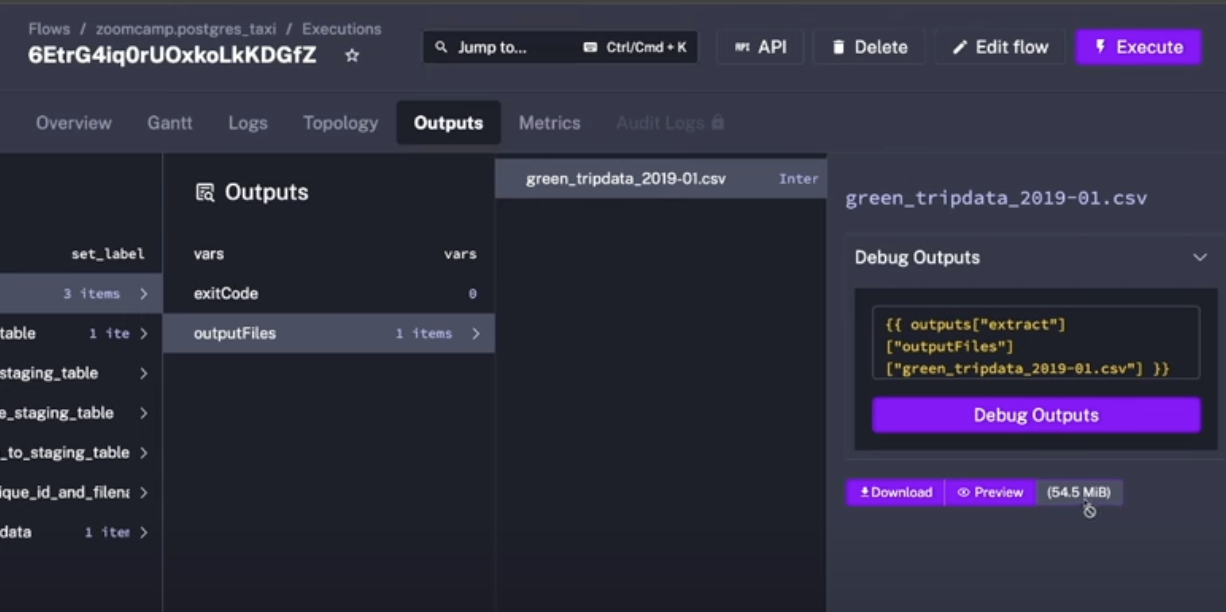

```yaml
  - id: purge_files
    type: io.kestra.plugin.core.storage.PurgeCurrentExecutionFiles
    description: This will remove output files. If you'd like to explore Kestra outputs, disable it.
```

This is the **final flow** for the **green taxi data ingestion**:

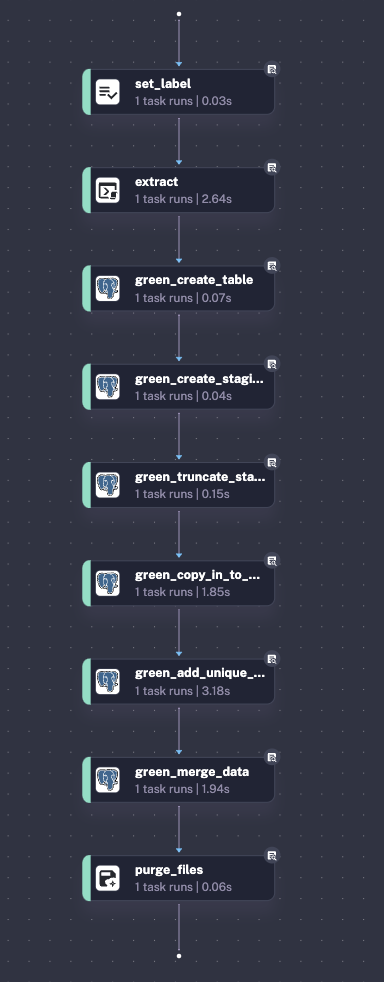

To create **separate flows for the yellow and green taxis**, we will use an **if statement** using two super tasks of type `io.kestra.plugin.core.flow.If`. We need to this because the schemas and cols names are slightly different for yellow and green taxis.

```yaml
  - id: if_yellow_taxi
    type: io.kestra.plugin.core.flow.If
    condition: "{{inputs.taxi == 'yellow'}}"
    then: ...[all the yellow taxi tasks]
  - id: if_green_taxi
    type: io.kestra.plugin.core.flow.If
    condition: "{{inputs.taxi == 'green'}}"
    then: ...[all the green taxi tasks]
```

#### **`02_postgres_taxi_scheduled.yaml`**

https://www.youtube.com/watch?v=_-li_z97zog&list=PLEK3H8YwZn1oPPShk2p5k3E9vO-gPnUCf&index=4

We are now going to discuss how to use **schedules** and **backfills** (for schedules missed in the past) to further **automate our pipeline**.

This time we will use a **trigger** to **extract specific months and years** to our postgres table. The trigger is used in the variables part:

```yaml
variables:
  file: "{{inputs.taxi}}_tripdata_{{trigger.date | date('yyyy-MM')}}.csv"
  staging_table: "public.{{inputs.taxi}}_tripdata_staging"
  table: "public.{{inputs.taxi}}_tripdata"
  data: "{{outputs.extract.outputFiles[inputs.taxi ~ '_tripdata_' ~ (trigger.date | date('yyyy-MM')) ~ '.csv']}}"
```




In this example our **trigger** is going to be the **schedule** that is going to **run automatically**. These is how the triggers look like in our flow example:

```yaml
triggers:
  - id: green_schedule
    type: io.kestra.plugin.core.trigger.Schedule
    cron: "0 9 1 * *"
    inputs:
      taxi: green

  - id: yellow_schedule
    type: io.kestra.plugin.core.trigger.Schedule
    cron: "0 10 1 * *"
    inputs:
      taxi: yellow
```

the `cron` expressions can be generated using this website: https://crontab.guru

In this case, the monthly data is extracted on the first of the month for each taxi dataset, the green at 9 am, the yellow at 10 am

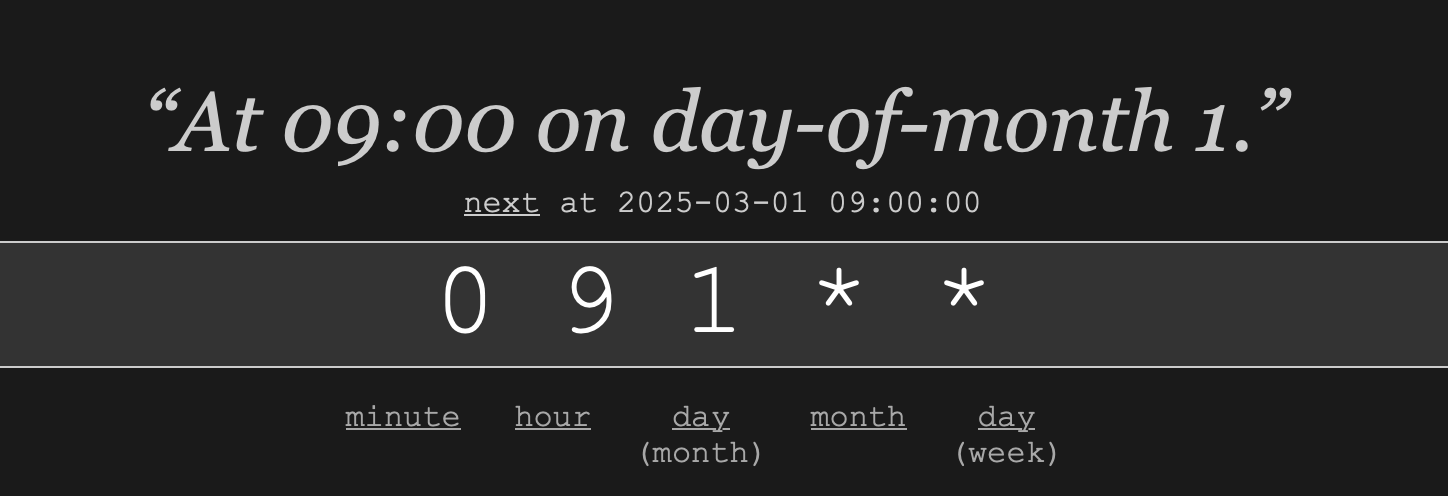

Scheduling automatises data retrieval in the future. To retrieve data from the past we can use